In [10]:
import pickle
import numpy as np
from sklearn.cross_validation import train_test_split
import re
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from stop_words import get_stop_words
import Stemmer
from sklearn.feature_extraction.text import CountVectorizer
import config
%matplotlib inline

In [2]:
def read_posts(owner_id):
    filename = 'data/{}.pkl'.format(owner_id)
    with open(filename, 'rb') as f:
        posts = pickle.load(f)
    return posts


def generate_dataset(posts):
    texts = [post['text'] for post in posts]
    likes = [post['likes'] for post in posts]
    return texts, likes


def clear_texts(texts, with_stemmer=True):
    clear_texts = []
    stop_words = get_stop_words('ru')
    stemmer = Stemmer.Stemmer('russian')

    for text in texts:
        text = text.lower()
        text = re.sub('[^а-я]', ' ', text)
        text = text.split()
        text = [t for t in text if t not in stop_words]
        if with_stemmer:
            text = stemmer.stemWords(text)
        clear_texts.append(' '.join(text))
    return clear_texts


def plot_date_likes(posts):
    fig, ax = plt.subplots()

    years = YearLocator()   # every year
    months = MonthLocator()  # every month
    yearsFmt = DateFormatter('%Y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)

    ax.set_xlabel('Year')
    ax.set_ylabel('Likes')
    ax.set_title('Horror stories')

    ax.plot_date([datetime.fromtimestamp(p['date']) for p in posts],
                 [p['likes'] for p in posts])

In [5]:
posts = read_posts(config.OWNER_ID)

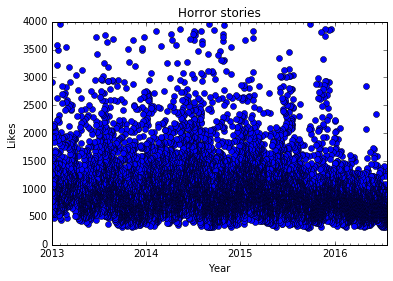

In [6]:
plot_date_likes(posts)

In [7]:
texts, labels = generate_dataset(posts)
clear_texts = clear_texts(texts)

In [12]:
texts_train, texts_test, y_train, y_test = train_test_split(clear_texts, labels, train_size=0.7,
                                                            random_state=100)

In [13]:
%%time
vect = CountVectorizer(analyzer='word', max_features=5000)
X_train = vect.fit_transform(texts_train)
X_test = vect.transform(texts_test)

CPU times: user 6.29 s, sys: 80 ms, total: 6.37 s
Wall time: 6.37 s


In [18]:
(X_train[0].toarray() == 1).sum()

161

In [23]:
sorted(vect.vocabulary_.items(), key=lambda k, v: v)

TypeError: <lambda>() missing 1 required positional argument: 'v'